In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
file_path = '/content/MPDecadeVarPop(1961-2011).xls'  # Update the path as needed
data = pd.read_excel(file_path)

In [ ]:
data.columns

Index([                                    1,
                             'District Code',
                                  'District',
                               'Census Year',
                                       'Pop',
       'Var since the preceding census -Abs',
         'Var since the preceding census -%',
                                     'Males',
                                   'Females',
                                 'Sex ratio',
                        'Population Density',
                            'Area in sq. km'],
      dtype='object')

In [ ]:
data.head(10)

,1,District Code,District,Census Year,Pop,Var since the preceding census -Abs,Var since the preceding census -%,Males,Females,Sex ratio,Population Density,Area in sq. km
0,23.0,006,MADHYA PRADESH,1961.0,23217910.0,4602979.0,24.730000,12020106.0,11197804.0,1073.434220,75.321198,308252.0
1,23.0,007,MADHYA PRADESH,1971.0,30016625.0,6798715.0,29.282201,15630250.0,14386375.0,1086.462017,97.376903,308252.0
2,23.0,008,MADHYA PRADESH,1981.0,38168507.0,8151882.0,27.157890,19866607.0,18301900.0,1085.494238,123.822415,308252.0
3,23.0,009,MADHYA PRADESH,1991.0,48566242.0,10397735.0,27.241660,25394673.0,23171569.0,1095.941022,157.553696,308252.0
4,23.0,010,MADHYA PRADESH,2001.0,60348023.0,11781781.0,24.259198,31443652.0,28904371.0,1087.851107,195.774960,308252.0
5,23.0,011,MADHYA PRADESH,2011.0,72626809.0,12278786.0,20.346625,37612306.0,35014503.0,1074.192200,235.608557,308252.0
6,23.0,418,Sheopur,1961.0,192944.0,41837.0,27.690000,103667.0,89277.0,1161.183732,29.207387,6606.0
7,23.0,418,Sheopur,1971.0,242988.0,50044.0,25.937059,128808.0,114180.0,1128.113505,36.782925,6606.0
8,23.0,418,Sheopur,1981.0,323649.0,80661.0,33.195466,171502.0,152147.0,1127.212498,48.993188,6606.0
9,23.0,418,Sheopur,1991.0,431480.0,107831.0,33.317267,229516.0,201964.0,1136.420352,65.316379,6606.0


In [ ]:
# Data Cleaning and Feature Engineering
data['Years_Since_1961'] = data['Census Year'] - 1961

# Handling gender-specific features based on input
data['Male_Female_Ratio'] = data['Males'] / data['Females']
data['Population_Growth_Rate'] = data.groupby('District')['Pop'].pct_change(fill_method=None)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)  # Replace NaN with 0

In [ ]:
# Features and Target Selection
features = data[['District', 'Years_Since_1961', 'Male_Female_Ratio', 'Population_Growth_Rate', 'Area in sq. km']]
target_pop = data['Pop']
target_density = data['Population Density']

In [ ]:
# One-hot encoding for categorical variables
features_encoded = pd.get_dummies(features, columns=['District'], drop_first=True)

In [ ]:
features_encoded.head()

,Years_Since_1961,Male_Female_Ratio,Population_Growth_Rate,Area in sq. km,District_ District formed after 2001 census shown in Italics print,District_ N.A. = Not Available,District_* The State figures of Males and Females are estimated for the year 1901 because sex wise,District_Alirajpur,District_Anuppur,District_Ashoknagar,...,District_Shajapur,District_Sheopur,District_Shivpuri,District_Sidhi,District_Singrauli,District_Tikamgarh,District_Ujjain,District_Umaria,District_Vidisha,District_distribution is not available in respect of many districts for that year .
0,0.0,1.073434,0.000000,308252.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10.0,1.086462,0.292822,308252.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20.0,1.085494,0.271579,308252.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30.0,1.095941,0.272417,308252.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40.0,1.087851,0.242592,308252.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Scaling numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded[['Years_Since_1961', 'Male_Female_Ratio', 'Population_Growth_Rate']])
scaled_features_df = pd.DataFrame(scaled_features, columns=['Years_Since_1961', 'Male_Female_Ratio', 'Population_Growth_Rate'])


# Combine scaled numerical features with encoded categorical features
features_encoded = pd.concat([scaled_features_df, features_encoded.drop(columns=['Years_Since_1961', 'Male_Female_Ratio', 'Population_Growth_Rate'])], axis=1)

In [ ]:
features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 59 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                         --------------  -----  
 0   Years_Since_1961                                                                                                               319 non-null    float64
 1   Male_Female_Ratio                                                                                                              319 non-null    float64
 2   Population_Growth_Rate                                                                                                         319 non-null    float64
 3   Area in sq. km                                                                                                

In [ ]:
target_pop.head()

,Pop
0,23217910.0
1,30016625.0
2,38168507.0
3,48566242.0
4,60348023.0


In [ ]:
scaled_features_df.head()

,Years_Since_1961,Male_Female_Ratio,Population_Growth_Rate
0,-1.374934,0.160765,-1.740582
1,-0.801596,0.219930,0.733971
2,-0.228257,0.215535,0.554452
3,0.345082,0.262977,0.561531
4,0.918420,0.226238,0.309492


In [ ]:
# Train-Test Split for Population and Population Density
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(features_encoded, target_pop, test_size=0.3, random_state=42)
X_train_density, X_test_density, y_train_density, y_test_density = train_test_split(features_encoded, target_density, test_size=0.3, random_state=42)

In [ ]:
X_train_pop.head()

,Years_Since_1961,Male_Female_Ratio,Population_Growth_Rate,Area in sq. km,District_ District formed after 2001 census shown in Italics print,District_ N.A. = Not Available,District_* The State figures of Males and Females are estimated for the year 1901 because sex wise,District_Alirajpur,District_Anuppur,District_Ashoknagar,...,District_Shajapur,District_Sheopur,District_Shivpuri,District_Sidhi,District_Singrauli,District_Tikamgarh,District_Ujjain,District_Umaria,District_Vidisha,District_distribution is not available in respect of many districts for that year .
180,-1.374934,-0.145124,-1.740582,10043.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
305,1.491759,0.062873,-0.103851,3427.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
268,0.918420,0.011358,-0.052474,3747.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
157,-0.801596,0.432089,1.182435,7371.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
66,-1.374934,-0.008372,-1.740582,7306.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Hyperparameter Optimization for Gradient Boosting
# param_grid = {
#     'subsample': [0.7, 0.8, 0.9],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7, 9],
#     'learning_rate': [0.01, 0.025, 0.05, 0.1],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

param_grid = {
    'subsample': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [ ]:
# Population Model
grid_search_pop = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_pop.fit(X_train_pop, y_train_pop)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=1)

In [ ]:
# Population Density Model
grid_search_density = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_density.fit(X_train_density, y_train_density)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=1)

In [ ]:
# Best Models
best_gb_pop = grid_search_pop.best_estimator_
best_gb_density = grid_search_density.best_estimator_

In [ ]:
# Training the Final Models
best_gb_pop.fit(X_train_pop, y_train_pop)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, subsample=0.7)

In [ ]:
# Training the Final Models
best_gb_density.fit(X_train_density, y_train_density)

GradientBoostingRegressor(n_estimators=300, subsample=0.9)

In [ ]:
# Model Evaluation for Population
y_pred_train_pop = best_gb_pop.predict(X_train_pop)
y_pred_test_pop = best_gb_pop.predict(X_test_pop)
train_mse_pop = mean_squared_error(y_train_pop, y_pred_train_pop)
test_mse_pop = mean_squared_error(y_test_pop, y_pred_test_pop)
train_r2_pop = r2_score(y_train_pop, y_pred_train_pop)
test_r2_pop = r2_score(y_test_pop, y_pred_test_pop)

print("Population Model Performance:")
print(f"Training MSE: {train_mse_pop:.2f}, R2: {train_r2_pop:.2f}")
print(f"Testing MSE: {test_mse_pop:.2f}, R2: {test_r2_pop:.2f}")

Population Model Performance:
Training MSE: 11611543914.12, R2: 1.00
Testing MSE: 5120404847395.36, R2: 0.93


In [ ]:
# Model Evaluation for Population Density
y_pred_train_density = best_gb_density.predict(X_train_density)
y_pred_test_density = best_gb_density.predict(X_test_density)
train_mse_density = mean_squared_error(y_train_density, y_pred_train_density)
test_mse_density = mean_squared_error(y_test_density, y_pred_test_density)
train_r2_density = r2_score(y_train_density, y_pred_train_density)
test_r2_density = r2_score(y_test_density, y_pred_test_density)

print("Population Density Model Performance:")
print(f"Training MSE: {train_mse_density:.2f}, R2: {train_r2_density:.2f}")
print(f"Testing MSE: {test_mse_density:.2f}, R2: {test_r2_density:.2f}")

Population Density Model Performance:
Training MSE: 20.84, R2: 1.00
Testing MSE: 3402.74, R2: 0.82


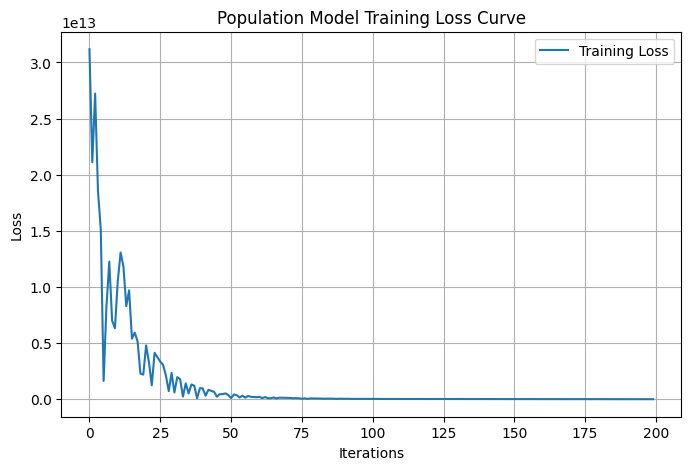

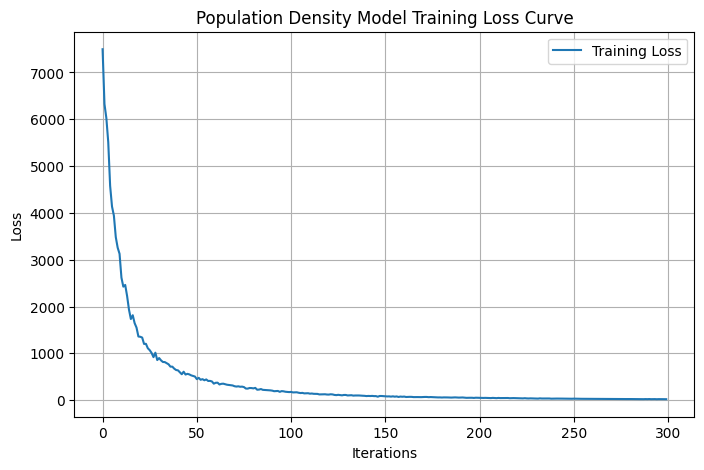

In [ ]:
# Plot Training and Validation Loss for Population
if hasattr(best_gb_pop, 'train_score_'):
    plt.figure(figsize=(8, 5))
    plt.plot(best_gb_pop.train_score_, label='Training Loss')
    plt.title("Population Model Training Loss Curve")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

# Plot Training and Validation Loss for Population Density
if hasattr(best_gb_density, 'train_score_'):
    plt.figure(figsize=(8, 5))
    plt.plot(best_gb_density.train_score_, label='Training Loss')
    plt.title("Population Density Model Training Loss Curve")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:

# Example: Predict for Sehore, 2029, Gender: None
def predict_population_and_density(district, year, gender):
    # Encode input
    years_since_1961 = year - 1961
    male_female_ratio = 1  # Default when gender is None
    if gender == 'male':
        male_female_ratio = data['Male_Female_Ratio'].mean()
    elif gender == 'female':
        male_female_ratio = 1 / data['Male_Female_Ratio'].mean()

    # Create input DataFrame
    input_data = pd.DataFrame({
        'Years_Since_1961': [years_since_1961],
        'Male_Female_Ratio': [male_female_ratio],
        'Population_Growth_Rate': [0],
        'Area in sq. km': [data[data['District'] == district]['Area in sq. km'].values[0]], # Add this line
        **{col: [0] for col in features_encoded.columns if col.startswith('District_')}
    })
    district_col = f'District_{district}'
    if district_col in input_data.columns:
        input_data[district_col] = 1

    # Scale numerical features
    input_data[['Years_Since_1961', 'Male_Female_Ratio', 'Population_Growth_Rate']] = scaler.transform(
        input_data[['Years_Since_1961', 'Male_Female_Ratio', 'Population_Growth_Rate']]
    )

    # Predict
    population = best_gb_pop.predict(input_data)[0]
    density = best_gb_density.predict(input_data)[0]

    return population, density

# Example usage
predicted_population, predicted_density = predict_population_and_density('Sehore', 2028, None)
print(f"Predicted Population for Sehore in 2028: {predicted_population:.2f}")
print(f"Predicted Population Density for Sehore in 2028: {predicted_density:.2f}")

Predicted Population for Sehore in 2028: 1043452.74
Predicted Population Density for Sehore in 2028: 180.72


## Explanation :

Okay, let's address your questions about the default male-female ratio and the use of None for gender in the predict_population_and_density function.

Default Male-Female Ratio:

Setting the default male-female ratio to 1 implies an assumption of an equal number of males and females in the population. This might not always be accurate, as natural sex ratios can vary slightly from 1:1 due to biological and environmental factors.

However, in the context of the provided function, setting the default to 1 is a reasonable approach when the user doesn't provide any gender-specific information. It serves as a neutral starting point, avoiding any biases towards either male or female population projections.


Input of None for Gender:

The gender parameter is set to None by default to allow the user to make predictions without specifying a particular gender. This is useful when you want to get an overall population estimate without considering gender-specific factors.

When the gender is None, the function uses the default male-female ratio (which is set to 1 in the current implementation). This enables the function to generate a prediction even when gender information is not explicitly provided.

In [ ]:
# Save the updated dataset
data.to_csv("updated_dataset.csv", index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(data)

NameError: name 'data' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load and preprocess data
data = pd.read_csv("updated_dataset.csv")

# Feature engineering
# Population density per km^2
data['Population_Per_Km2'] = data['Pop'] / data['Area']

# Placeholder columns for target variables (replace with real data or assumptions)
data['Public_Washrooms_Required'] = (data['Pop'] / 1000).astype(int)  # Assumption: 1 washroom per 1000 people
data['Universities_Required'] = (data['Pop'] / 500000).astype(int)    # Assumption: 1 university per 500,000 people
data['Schools_Required'] = (data['Pop'] / 2000).astype(int)          # Assumption: 1 school per 2000 people
data['Industries_Required'] = (data['Population_Density'] / 100).astype(int)  # Assumption: 1 industry per 100 density
data['Healthcare_Facilities_Required'] = (data['Pop'] / 10000).astype(int)  # Assumption: 1 healthcare facility per 10,000 people
data['Apartments_Required'] = (data['Population_Density'] / 50).astype(int) # Assumption: 1 apartment block per 50 density

# New target variables based on provided assumptions:
data['Primary_Healthcare_Required'] = (data['Pop'] / 30000).astype(int)  # 1 per 30,000 people
data['Community_Healthcare_Centre_Required'] = (data['Pop'] / 120000).astype(int)  # 1 per 120,000 people

# Primary school requirements (age range 0-15; 15% of the population)
data['Primary_School_Required_Min'] = (data['Pop'] * 0.15 / 300).astype(int)  # 1 school per 300 students
data['Primary_School_Required_Max'] = (data['Pop'] * 0.15 / 500).astype(int)  # 1 school per 500 students

# Secondary school requirements (age range 15-18; 10% of the population)
data['Secondary_School_Required_Min'] = (data['Pop'] * 0.10 / 500).astype(int)  # 1 school per 500 students
data['Secondary_School_Required_Max'] = (data['Pop'] * 0.10 / 1000).astype(int)  # 1 school per 1000 students

# Dispensary requirements
data['Dispensary_Required_Min'] = (data['Pop'] / 5000).astype(int)  # 1 dispensary per 5000 people
data['Dispensary_Required_Max'] = (data['Pop'] / 10000).astype(int)  # 1 dispensary per 10,000 people

# Step 2: Prepare features and target variables
X = data[['Population_Density', 'Pop', 'Area', 'Population_Per_Km2']]
y = data[['Public_Washrooms_Required', 'Universities_Required', 'Schools_Required',
          'Industries_Required', 'Healthcare_Facilities_Required', 'Apartments_Required',
          'Primary_Healthcare_Required', 'Community_Healthcare_Centre_Required',
          'Primary_School_Required_Min', 'Primary_School_Required_Max',
          'Secondary_School_Required_Min', 'Secondary_School_Required_Max',
          'Dispensary_Required_Min', 'Dispensary_Required_Max']]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Errors for each target variable:")
for i, column in enumerate(y.columns):
    print(f"{column}: {mse[i]}")

# Step 7: Test on new data
new_data = pd.DataFrame({
    'Population_Density': [3000],
    'Pop': [5000000],
    'Area': [2000],
    'Population_Per_Km2': [3000]
})

predicted_amenities = model.predict(new_data)
print("Predicted amenities for new data:")
print(predicted_amenities)


FileNotFoundError: [Errno 2] No such file or directory: 'updated_dataset.csv'

# *Explain formula for lanes*


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To estimate the number of lanes needed, first, predict future vehicle demand using the population growth formula. Then, calculate peak-hour traffic by multiplying future vehicles with the peak-hour factor (PHF). Next, determine lane requirements by dividing peak-hour traffic by the lane capacity. Finally, round up the result and consider adding extra lanes for future growth and heavy vehicles.  

Formulas Used:
1.	Future Vehicles:
              Future Vehicles = Current Vehicles × (Future Population/Current Population)^α
2.	Peak Hour Traffic:
              Peak Hour Traffic = Future Vehicles × PHF
3.	Lanes Needed:
              Lanes Needed = Peak Hour Traffic / Lane Capacity
4.	Final Lanes (Rounded Up):
              Final Lanes = ⌈Lanes Needed⌉


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [ ]:
# Load the datasets
vehicle_df = pd.read_csv("/content/avg_run_rate.csv")
# data = pd.read_excel("/content/MPDecadeVarPop(1961-2011).xls")

In [ ]:
vehicle_df.head()

,District Code,District,Census Year,Pop,Var since the preceding census -Abs,Var since the preceding census -%,Males,Females,Sex ratio,Population Density,Area in sq. km,Average_Vehicle_Run_Rate
0,444.0,Bhopal,1961.0,"3,71,715","1,36,050",57.73,"2,04,693","1,67,022",1225.545138,134.10,"2,772",1060.0
1,444.0,Bhopal,1971.0,"5,72,169","2,00,454",53.93,"3,11,046","2,61,123",1191.185763,206.41,"2,772",1060.0
2,444.0,Bhopal,1981.0,"8,94,739","3,22,570",56.38,"4,77,531","4,17,208",1144.587352,322.78,"2,772",1060.0
3,444.0,Bhopal,1991.0,"13,51,479","4,56,740",51.05,"7,15,283","6,36,196",1124.312319,487.55,"2,772",1060.0
4,444.0,Bhopal,2001.0,"18,43,510","4,92,031",36.41,"9,72,649","8,70,861",1116.882028,665.05,"2,772",1060.0


In [ ]:
# Function to calculate CAGR
def calculate_cagr(initial_value, final_value, years):
    if initial_value <= 0:
        return 0
    return ((final_value / initial_value) ** (1 / years)) - 1

# ✅ Updated PHF - Peak hour factor map for full 24 hours
def get_phf_by_time(current_time):
    hour = current_time.hour
    phf_map = {
        0: 0.60,  1: 0.55,  2: 0.50,  3: 0.50,  4: 0.55,  5: 0.70,
        6: 0.85,  7: 0.88,  8: 0.90,  9: 0.87, 10: 0.85, 11: 0.83,
       12: 0.80, 13: 0.82, 14: 0.84, 15: 0.86, 16: 0.87, 17: 0.88,
       18: 0.90, 19: 0.88, 20: 0.82, 21: 0.75, 22: 0.70, 23: 0.65
    }
    return phf_map.get(hour, 0.85)

In [ ]:
def predict_lanes_based_on_population_and_avrr(district, future_year, gender=None, lane_capacity=1000):
    # Predict population and density
    predicted_population, predicted_density = predict_population_and_density(district, future_year, gender)
    print("The predicted population is : ", predicted_population)
    # Get current year and population
    current_year = datetime.now().year

    current_population = data[(data['Census Year'] == 2011) & (data['District'] == f'{district}')]['Pop'].values[0]
    print("The current population is : ", current_population)

    # Get current AVRR
    current_AVRR = vehicle_df[vehicle_df['District'] == district]['Average_Vehicle_Run_Rate '].mean()

    # Calculate growth rate and future AVRR
    g = (predicted_population - current_population) / current_population
    print("The predicted population difference", g)
    n = future_year - current_year
    future_AVRR = current_AVRR * ((1 + g) ** n)

    # Get PHF for current time
    adjustment_factor = get_phf_by_time(datetime.now())

    # Calculate lanes required
    lanes_required = future_AVRR / (lane_capacity * adjustment_factor)
    lanes_required = math.ceil(lanes_required)
    lanes_required = max(2, min(8, lanes_required))

    return lanes_required

# Example usage
lanes_needed = predict_lanes_based_on_population_and_avrr('Sehore', 2035)
print(f"Predicted number of lanes needed for Sehore in 2028: {lanes_needed}")

The predicted population is :  1116570.7861421832
The current population is :  1311332.0
The predicted population difference -0.1485216664108073
Predicted number of lanes needed for Sehore in 2028: 2


In [ ]:
def predict_lanes_assumption_based(district, future_year, gender=None, lane_capacity=1000):
    # Get current year
    current_year = datetime.now().year

    # Get current population
    current_population = data[(data['Census Year'] == 2011) & (data['District'] == f'{district}')]['Pop'].values[0]
    # print("The current population is : ", current_population)

    # Get the last available population growth rate for the district
    last_growth_rate = data[data['District'] == district]['Population_Growth_Rate'].iloc[-1]
    yearly_growth_rate = last_growth_rate / 10

    # Calculate the number of years into the future
    years_into_future = future_year - current_year

    # Predict future population using the yearly growth rate
    predicted_population = current_population * ((1 + yearly_growth_rate) ** years_into_future)
    # print("The predicted population is : ", predicted_population)

    # Get current AVRR
    current_AVRR = vehicle_df[vehicle_df['District'] == district]['Average_Vehicle_Run_Rate '].mean()

    # Calculate growth rate and future AVRR
    g = (predicted_population - current_population) / current_population

    future_AVRR = current_AVRR * ((1 + g) ** years_into_future)

    # Get PHF for current time
    adjustment_factor = get_phf_by_time(datetime.now())

    # Calculate lanes required
    lanes_required = future_AVRR / (lane_capacity * adjustment_factor)
    lanes_required = math.ceil(lanes_required)
    lanes_required = max(2, min(8, lanes_required))

    return lanes_required

# Example usage
lanes_needed = predict_lanes_assumption_based('Sehore', 2035)
print(f"Predicted number of lanes needed for Sehore in 2035: {lanes_needed}")

Predicted number of lanes needed for Sehore in 2035: 7


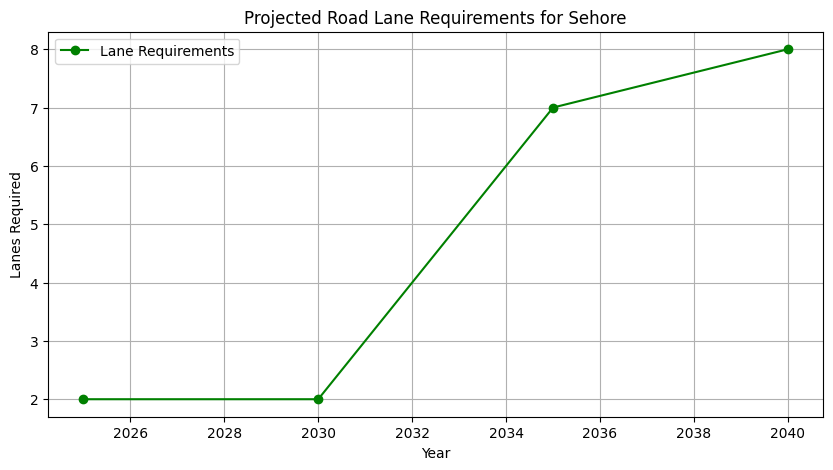

In [ ]:
# Plotting for Sehore
import matplotlib.pyplot as plt

district = "Sehore"
future_years = [2025, 2030, 2035, 2040]

# Calculate lanes needed for each future year using the new function
lanes_needed_per_year = [predict_lanes_assumption_based(district, year) for year in future_years]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(future_years, lanes_needed_per_year, marker='o', color='green', label='Lane Requirements')
plt.xlabel("Year")
plt.ylabel("Lanes Required")
plt.title(f"Projected Road Lane Requirements for {district}")
plt.legend()
plt.grid()
plt.show()

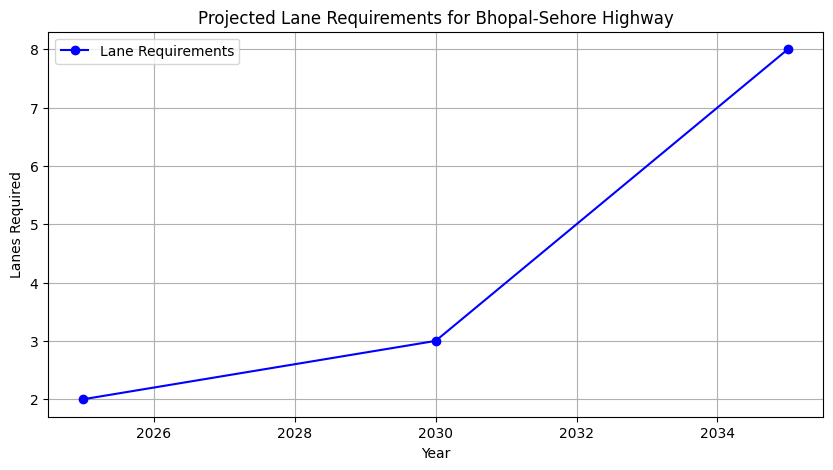

In [ ]:
import matplotlib.pyplot as plt

# Years for which to estimate lanes
years = list(range(2025, 2040, 5))

# Calculate lanes required for each year
lanes_required = [
    max(
        predict_lanes_assumption_based('Bhopal', year),
        predict_lanes_assumption_based('Sehore', year)
    )
    for year in years
]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(years, lanes_required, marker='o', color='blue', label='Lane Requirements')
plt.xlabel("Year")
plt.ylabel("Lanes Required")
plt.title("Projected Lane Requirements for Bhopal-Sehore Highway")
plt.legend()
plt.grid()
plt.show()

In [1]:

    # 🔹 Step 1: Encode District column in 'data' for ML input
features_encoded = pd.get_dummies(data['District'], prefix='District')

# 🔹 Step 2: Merge encoded districts back into 'data'
data_encoded = pd.concat([data, features_encoded], axis=1)

# 🔹 Step 3: Calculate 'Years_Since_1961' and placeholder for 'Population_Growth_Rate'
data_encoded['Years_Since_1961'] = data_encoded['Census_Year'] - 1961
data_encoded['Population_Growth_Rate'] = 0  # You can update this if needed

# 🔹 Step 4: Fit scaler on the required features
scaler = StandardScaler()
scaler.fit(data_encoded[['Years_Since_1961', 'Male_Female_Ratio', 'Population_Growth_Rate']])
# Clean column names
vehicle_df.columns = vehicle_df.columns.str.strip()
data.columns = data.columns.str.strip()

# Function to predict lanes using predicted population
def predict_lanes(district, future_year):
    predicted_population, predicted_density = predict_population_and_density(district, future_year)

    current_year = datetime.now().year
    current_population = data[data['Census_Year'] == 2011]['Pop'].sum()
    current_AVRR = data[data['District'] == district]['Average_Vehicle_Run_Rate'].mean()
    lane_capacity = 1000
    adjustment_factor = get_phf_by_time(datetime.now())  # ✅ Full-day PHF here too

    g = (predicted_population - current_population) / current_population
    n = future_year - current_year
    future_AVRR = current_AVRR * ((1 + g) ** n)

    lanes_required = future_AVRR / (lane_capacity * adjustment_factor)
    lanes_required = math.ceil(lanes_required)
    lanes_required = max(2, min(8, lanes_required))

    return lanes_required

# Plotting for Sehore
district = "Sehore"
future_years = [2025, 2030, 2035, 2040]
future_populations = [1600000, 1700000, 1850000, 2000000]

lanes_needed_per_year = [estimate_lanes(district, pop, year) for pop, year in zip(future_populations, future_years)]

plt.figure(figsize=(10, 5))
plt.plot(future_years, lanes_needed_per_year, marker='o', color='green', label='Lane Requirements')
plt.xlabel("Year")
plt.ylabel("Lanes Required")
plt.title(f"Projected Road Lane Requirements for {district}")
plt.legend()
plt.grid()
plt.show()

# Estimating lanes for Bhopal-Indore highway
for year in range(2025, 2040, 5):
    lanes_bhopal = predict_lanes('Bhopal', year)
    lanes_sehore = predict_lanes('Sehore', year)
    print(f"Lanes required for Bhopal-Indore highway in {year}: {max(lanes_bhopal, lanes_sehore)}")


IndentationError: expected an indented block after function definition on line 19 (<ipython-input-1-3514dbb16e20>, line 20)